<a href="https://colab.research.google.com/github/abchotujnn1/bayes-labs-project/blob/master/clearance_total_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#setting the environment for pytorch geometry:

In [0]:
!pip install --upgrade torch-scatter
!pip install --upgrade torch-sparse
!pip install --upgrade torch-cluster
!pip install torch-geometric

  Created wheel for torch-scatter: filename=torch_scatter-1.4.0-cp36-cp36m-linux_x86_64.whl size=2929712 sha256=08edaaece4841d35d508eb36bf819262693fe224e4e0a42a7c27207f8ddada88
  Stored in directory: /root/.cache/pip/wheels/25/00/c4/1637b4b3003f29092f4fe2ad4b40dd10906269c1ac2dc82941
Successfully built torch-scatter
  Created wheel for torch-sparse: filename=torch_sparse-0.4.3-cp36-cp36m-linux_x86_64.whl size=3966936 sha256=13955d91c09efa92844c131cdad62b92c53995e4c51696650c3e460e59a8a72b
  Stored in directory: /root/.cache/pip/wheels/02/66/2b/befece01c2516f9fb3e7b4d150bb2b871221c73657c9cd7735
Successfully built torch-sparse
  Created wheel for torch-cluster: filename=torch_cluster-1.4.5-cp36-cp36m-linux_x86_64.whl size=16219895 sha256=7b43b2e4a17d73dc9c7945f65fe7249cadd83f737ec590cb0463ce9d08e54d74
  Stored in directory: /root/.cache/pip/wheels/0a/26/7e/a6d6a80eae5ca39b92bc77773f36cf433d5085de18014382b1
Successfully built torch-cluster
     |████████████████████████████████| 133kB 45.8M

# Setting the environment for rdkit

In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit


--2020-01-31 05:35:03--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M   121MB/s    in 0.6s    

2020-01-31 05:35:04 (121 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

In [0]:
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

#mounting the google drive to access the drive data

In [0]:
from google.colab import drive
drive.mount('/content/drive')




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [0]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/clearance/Dataset_chembl_clearcaco.txt",delimiter=";")
data = data[['Canonical_Smiles', 'hlm_clearance[mL.min-1.g-1]']]
data.head()
# df = pd.read_csv("/content/clearance.csv")
# l=list(df['smile'])


,Canonical_Smiles,hlm_clearance[mL.min-1.g-1]
0,CCOc1ccc(Nc2c(C)c(N[C@H]3CCCNC3)nc4ccnn24)cc1,10
1,N[C@@H]1CC[C@H](CC1)Nc2cc(Nc3ccc(F)c(Cl)c3)n4n...,10
2,COc1ccc(CC(=O)\N=C(/N)\N[C@H](CC2CCCCC2)C(=O)N...,NaN
3,COc1ccccc1C(=O)\C=C\c2ccccc2C(F)(F)F,150
4,COc1cc2ncnc(Nc3c(C)c(O)ccc3F)c2cc1OC,"6,2"


In [0]:
data.dropna(subset=['hlm_clearance[mL.min-1.g-1]'], inplace=True)
data.drop_duplicates(subset='Canonical_Smiles',inplace=True)
# target=data['hlm_clearance[mL.min-1.g-1]']

In [0]:
target = [float(re.sub(",", ".", str(i))) for i in data['hlm_clearance[mL.min-1.g-1]']]

In [0]:
print(target)

[10.0, 10.0, 150.0, 6.2, 10.0, 70.0, 40.0, 26.0, 19.0, 11.0, 10.0, 10.0, 15.0, 10.0, 10.0, 31.0, 45.0, 44.0, 40.0, 10.0, 10.0, 10.0, 0.6, 0.6, 3.4, 72.0, 18.0, 0.5, 100.0, 100.0, 17.0, 23.0, 49.0, 19.0, 23.0, 49.0, 100.0, 56.0, 22.0, 100.0, 100.0, 887.0, 1.9, 15.0, 14.0, 4.2, 2.96, 0.5, 1.04, 0.41, 0.6, 0.6, 0.87, 0.2, 0.6, 0.21, 0.16, 0.26, 0.41, 0.2, 0.2, 24.0, 47.0, 2.4, 69.0, 12.0, 161.0, 4.2, 9.6, 19.2, 67.0, 54.5, 10.2, 39.5, 7.1, 82.7, 4.0, 33.6, 8.0, 9.0, 53.0, 32.0, 77.0, 5.0, 30.0, 72.0, 5.0, 64.0, 32.0, 5.0, 5.0, 5.0, 88.4, 45.8, 126.7, 12.7, 108.9, 166.2, 18.9, 22.6, 17.8, 17.0, 19.4, 17.4, 0.5, 12.0, 12.0, 5.0, 14.0, 37.0, 5.0, 3.0, 5.0, 5.0, 19.0, 38.0, 38.0, 70.5, 3.0, 10.0, 14.0, 13.0, 23.0, 30.0, 17.0, 10.0, 5.0, 1.0, 9.0, 28.0, 8.0, 33.0, 1.2, 5.0, 5.0, 9.0, 22.4, 5.0, 5.0, 14.1, 5.0, 5.0, 16.0, 6.7, 78.3, 5.0, 5.0, 5.0, 11.5, 5.0, 5.0, 44.4, 7.0, 18.7, 12.8, 5.0, 5.6, 120.0, 84.0, 2.0, 14.0, 1.0, 73.0, 72.0, 26.0, 3.0, 30.0, 6.0, 595.0, 5.7, 12.0, 11.0, 5.7, 56.0, 1.

In [0]:
print(len(data))

5339


In [0]:
print(len(data['Canonical_Smiles'].unique()))

5339


(array([4.402e+03, 5.400e+02, 1.870e+02, 9.800e+01, 6.000e+01, 2.600e+01,
        1.200e+01, 5.000e+00, 5.000e+00, 4.000e+00]),
 array([1.60000e-01, 1.02144e+02, 2.04128e+02, 3.06112e+02, 4.08096e+02,
        5.10080e+02, 6.12064e+02, 7.14048e+02, 8.16032e+02, 9.18016e+02,
        1.02000e+03]),
 <a list of 10 Patch objects>)

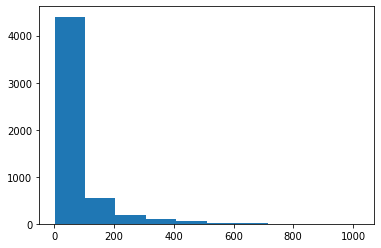

In [0]:
plt.hist(target)


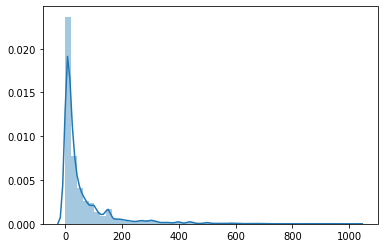

In [0]:
sns.distplot(target)

#Converting the smiles(molecules) into graph data

In [0]:
# clr_path="/content/drive/My Drive/Colab Notebooks/Dataset_chembl_clearcaco.txt"

In [0]:
###################Importing the requires library###############
import torch
import math
import numpy as np
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import torch.nn.functional as F
from torch import nn, optim
import rdkit
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit.Chem import rdBase
from rdkit.Chem.Draw import IPythonConsole
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torch_geometric.data import Data
###############################one-hot encoding for every feature of atom##############
def one_of_k_encoding(x, allowable_set):
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x==s, allowable_set))
############################generating atomic features of atom######################### 
def atom_feature(atom):
    # symbol_set = ['C', 'N', 'O', 'S', 'F', 'H', 'Si', 'P', 'Cl', 'Br',
    #               'Li', 'Na', 'K', 'Mg', 'Ca', 'Fe', 'As', 'Al', 'I', 'B',
    #               'V', 'Tl', 'Sb', 'Sn', 'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn',
    #               'Ge', 'Cu', 'Au', 'Ni', 'Cd', 'Mn', 'Cr', 'Pt', 'Hg', 'Pb'] #40
    symbol_set = ['C', 'N', 'O', 'S', 'F', 'H', 'P', 'Cl', 'Br', 'K', 'Mg','Si']  # 12
    # degree_set = [0, 1, 2, 3, 4, 5]  # 6
    num_hydrogens_set = [0, 1, 2, 3, 4]  # 5
    valency_set = [0, 1, 2, 3, 4, 5]  # 6
    formal_charge_list = [-3, -2, -1, 0, 1, 2, 3]  # 7
    hybridization_list = [Chem.rdchem.HybridizationType.SP, Chem.rdchem.HybridizationType.SP2,
                          Chem.rdchem.HybridizationType.SP3, Chem.rdchem.HybridizationType.SP3D,
                          Chem.rdchem.HybridizationType.SP3D2]  # 5
    number_radical_e_list = [0, 1, 2]  # 3
    # chirality = ['R', 'S'] #1
    # Aromatic              #1
    mol_wt=[12.011, 14.007, 15.99, 32.065,18.998,1.007,30.97,35.453, 79.904, 39.098, 24.305,28.085]
    m=np.mean(mol_wt)
    st_d=np.std(mol_wt)
    std_mol_wt=[(i-m)/st_d for i in mol_wt]


    return np.array(list(np.multiply(one_of_k_encoding(atom.GetSymbol(), symbol_set), std_mol_wt)) + ####12
                                                                                                     # one_of_k_encoding(atom.GetDegree(), degree_set) +
                    one_of_k_encoding(atom.GetTotalNumHs(), num_hydrogens_set) +                   ######5
                    one_of_k_encoding(atom.GetImplicitValence(), valency_set) +                    ######6
                    one_of_k_encoding(atom.GetFormalCharge(), formal_charge_list) +                ######7
                    one_of_k_encoding(atom.GetHybridization(), hybridization_list) +               ######5
                    one_of_k_encoding(atom.GetNumRadicalElectrons(), number_radical_e_list) +      ######3
                    [atom.GetIsAromatic()] + [atom.HasProp('_ChiralityPossible')]).astype('float') ######1+1
################################## Representing one molecule to graph data ###########################
def graph_representation(mol,label, max_atoms):
    adj = np.zeros((max_atoms, max_atoms))
    atom_features = np.zeros((max_atoms, 40))
    num_atoms = mol.GetNumAtoms()
    adj[0:num_atoms, 0:num_atoms] = Chem.rdmolops.GetAdjacencyMatrix(mol)
    edge0 = []
    edge1 = []
    for i, l in enumerate(adj):
        for j, k in enumerate(l):
            if (k == 1):
                edge0.append(i)
                edge1.append(j)
    edge_idx=[edge0,edge1]
    features_tmp = []
    for atom in mol.GetAtoms():
        features_tmp.append(atom_feature(atom))
    atom_features[0:num_atoms, 0:40] = np.array(features_tmp)
    return edge_idx, atom_features,label

############################ total data to graph data ####################### 
def graph_d(smiles):
    graph_data=[]
    for i,j in smiles.values:
        mol=Chem.MolFromSmiles(i)
        edge_index, x, l=graph_representation(mol, j, 40)
        edge_index=torch.tensor(edge_index,dtype=torch.long)
        x=torch.tensor(x,dtype=torch.float)
        l=torch.tensor(l,dtype=torch.float).view(1,-1)
        d=Data(x=x,edge_index=edge_index,y=l)
        graph_data.append(d)
    return graph_data
######################upper label fixing for the lebel #####################
def u_label(x):
    if(x>=500):
        return 500
    return x

61.2509953876838
94.88649263470947
-1.7006258447511747e-16
1.0
Data(edge_index=[2, 54], x=[40, 40], y=[1, 1])
5087
-0.032382441966803586
0.9938032406437317
0.0008766567688815354
1.008311664585809


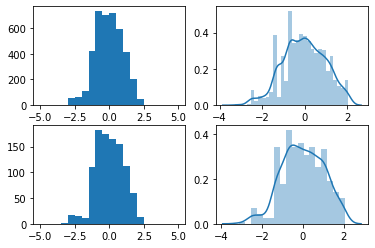

In [0]:
clr_path="/content/drive/My Drive/Colab Notebooks/clearance/Dataset_chembl_clearcaco.txt"
###################  Preparing the dataloader for dataset  ###############################
class NumbersDataset(Dataset):
    def __init__(self, clr_path):
        with open(clr_path) as clr_data:
            self.data = pd.read_csv(clr_data, delimiter=";")
            self.data_f = self.data[['Canonical_Smiles', 'hlm_clearance[mL.min-1.g-1]']]
            self.data_f = self.data_f.dropna()
            # target=[math.log(float(re.sub(",", ".", str(i)))) for i in self.data_f['hlm_clearance[mL.min-1.g-1]']]
            target = [float(re.sub(",", ".", str(i))) for i in self.data_f['hlm_clearance[mL.min-1.g-1]']]
            
            # target=target[i if(i<=700) for i in target]
            target=list(map(u_label,target))
            print(np.mean(target))
            print(np.std(target))

            target = [math.log(k) for k in target]
            m=np.mean(target)
            st_d=np.std(target)
            # print(m)
            # print(st_d)
            target=[(i-m)/st_d for i in target]
            print(np.mean(target))
            print(np.std(target))
            self.data_f=self.data_f.drop('hlm_clearance[mL.min-1.g-1]',axis=1)
            self.data_f['label']=target
            # self.data_f['label']= self.data_f['label'].map(u_label)
            self.data_f['num_a'] = [Chem.MolFromSmiles(m).GetNumAtoms() for m in self.data_f['Canonical_Smiles']]
            self.data_f = self.data_f[self.data_f['num_a'] <= 40]
            self.data_f=self.data_f.drop('num_a',axis=1)
            self.data_f = graph_d(self.data_f)
            random.seed(123)
            random.shuffle(self.data_f)
    def __len__(self):
        return len(self.data_f)
    def __getitem__(self, idx):
        return self.data_f[idx]
dataset=NumbersDataset(clr_path)
print(dataset[0])
print(len(dataset))

d_train=dataset[:4070]
d_test=dataset[4070:]
################# Visualizing the distribution of train and test target value ####################
l1=[float(i.y) for i in d_train]
l2=[float(i.y) for i in d_test]
print(np.mean(l1))
print(np.std(l1))
print(np.mean(l2))
print(np.std(l2))
plt.figure(1)
plt.subplot(221)
plt.hist(l1,range=[-5,5],bins=20)
plt.subplot(222)
sns.distplot(l1)
plt.subplot(223)
plt.hist(l2,range=[-5,5],bins=20)
plt.subplot(224)
sns.distplot(l2)
plt.show()

In [0]:
# clr_path="C:/Users/User/Music/Desktop/New folder (2)/SuppInfo/Dataset_chembl_clearcaco.txt"
# dataset=NumbersDataset(clr_path)
# d_train=dataset[:4070]
# d_test=dataset[4070:]

# Model preparation 

# For model architecture:
It consist two simplified graph convolutional (SGConv) layer, one GAraph attention layer(GATConv) and then followed by three linear layer
#Hyperparameter:
model=GCN_network(40, 128, 256, 128, 512, 128, 0.5,2).

128, 256, 128, 512, 128 hiddeh layer.

0.5 dropout rate

For graph convolutional 2 indepth convolutional in every layer. 


In [0]:
import torch
from torch import nn,optim
from torch.nn import functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import GATConv
from torch_geometric.nn import SGConv
class GCN_network(torch.nn.Module):
    def __init__(self,in_ch, hid1, hid2, hid3, l1_hid,l2_hid, drop, K):
        super(GCN_network,self).__init__()
        self.drop=drop
        self.conv1=SGConv(in_ch,hid1,K)
        self.conv2=SGConv(hid1,hid2,K)
        self.conv3=GATConv(hid2,hid3)

        self.l1=nn.Linear(40*hid3,l1_hid)
        self.l2=nn.Linear(l1_hid,l2_hid)
        self.l3=nn.Linear(l2_hid,1)
        self.l=nn.LeakyReLU(0.1)
    def forward(self,data):
        x=data.x
        edge_index=data.edge_index
        x=self.l(self.conv1(x,edge_index))
        x = F.dropout(x, self.drop, training=self.training)
        x=self.l(self.conv2(x,edge_index))
        x=self.l(self.conv3(x,edge_index))
        self.grad_value = x.clone()
        x=x.view(int(len(x)/40),-1)
        x=self.l(self.l1(x))
        x=F.dropout(x,self.drop,training=self.training)
        x=self.l(self.l2(x))
        x=F.dropout(x,self.drop, training=self.training)
        x=self.l3(x)
        return x
    def cam(self):
        return self.l1.weight.data,self.grad_value
# model=GCN_network(0.5)
# print(model)

# Training tha model
Training the model on GPU

For 300 epochs

Batch size 16

optimizer: Adam optimizer with learning rate=0.001

Loss function: RMSE loss



In [0]:
import torch
from torch import nn
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
# clr_path="C:/Users/User/Music/Desktop/New folder (2)/SuppInfo/Dataset_chembl_clearcaco.txt"
# dataset=NumbersDataset(clr_path)
# d_train=dataset[:4070]
# l=[float(i.y) for i in d_train]
# plt.hist(l,range=[0, 5],bins=10)
# plt.show()
loader = DataLoader(d_train, batch_size=16, shuffle=True)
model=GCN_network(40, 128, 256, 128, 512, 128, 0.5,2).cuda()###########################################################
#############LOSS_FUNCN#######################################
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
    def forward(self, yhat, y):
        return torch.sqrt(self.mse(yhat, y))
optimizer = optim.Adam(model.parameters(),lr=0.001)
criterion = RMSELoss()
l_track=10
##############################TRAINING#######################
for epoch in range(300):
    count=0
    l=0
    for data in loader:
        optimizer.zero_grad()
        data=data.to('cuda')######################################
        output=model(data)
        loss=criterion(output,data.y)
        loss.backward()
        optimizer.step()
        l+=loss.item()
        count+=1
    if(epoch%10==0):
        print(l/count)
    if(l/count<=l_track):
        l_track=l/count
        torch.save(model,'chmblclr_inter.pt')
torch.save(model,'chmblclr.pt')

0.9709075436872594
0.7112376125419841
0.5733258844590654
0.4890031599530987
0.4501111668698928
0.4234813792448418
0.3986589188084883
0.3907608828123878
0.3721353261494169
0.3664950383060119
0.3593695159636292
0.35110167107161355
0.3544725855775908
0.34155660055431664
0.34100695492005817
0.3307387520869573
0.3284492874846739
0.3284746738041148
0.3240800985518624
0.32457513289124357
0.3231564335378946
0.3162339083119935
0.30770512790072196
0.3131428194396636
0.31677789132969053
0.3087548011658238
0.3011920042482077
0.3034573257553811
0.3054808428474501
0.3096537629178926


# Testing the Model
Matrix used r2

y:(-3.1113548278808594, -3.1113548278808594, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.507793664932251, -2.3876984119415283, -2.2861592769622803, -2.2861592769622803, -2.198202133178711, -2.198202133178711, -2.1206183433532715, -2.0512173175811768, -2.0512173175811768, -2.0512173175811768, -2.0512173175811768, -2.0512173175811768, -2.0512173175811768, -2.0512173175811768, -2.0512173175811768, -2.0512173175811768, -2.0253825187683105, -1.9311219453811646, -1.9311219453811646, -1.878397822380066, -1.829582929611206, -1.78413724899292, -1.7416256666183472, -1.7016922235488892, -1.5946409702301025, -1.5946409702301025, -1.5946409702301025, -1.5946409702301025, -1.502579689025879, -1.4476561546325684, -1.4218214750

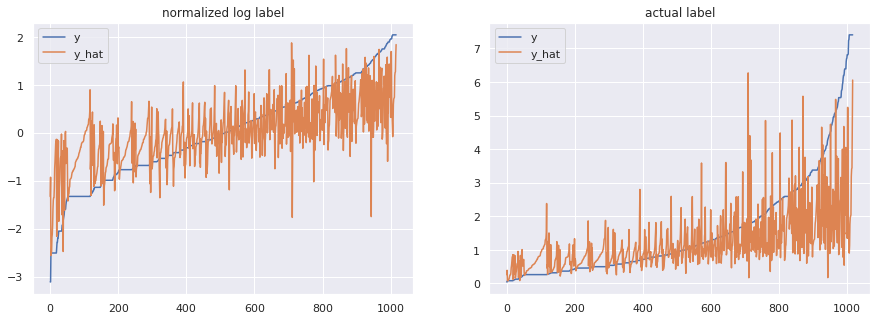

In [0]:
import math 
from math import e
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
model=torch.load('chmblclr.pt')
# model=torch.load('chmblclr_inter.pt')
model=model.eval()
###################DATA_LOADER############################
# clr_path="E:/ind content/bayes_labs_project/deepchem_data/ADME_DATA/clearance.csv"
# clr_path="C:/Users/User/Music/Desktop/New folder (2)/SuppInfo/Dataset_chembl_clearcaco.txt"
# dataset=NumbersDataset(clr_path)
# d_test=dataset[4070:]
# # d_test=dataset[:4070]
######################ACCURACY_MEASURE#####################################
def accuracy_measure(d_test):
    y_hat = []
    y=[]
    for data in d_test:
        output=model(data.to('cuda'))
        y_hat.append(output.item())
        y.append(float(data.y.view(1)))
    return y,y_hat

y,y_hat = accuracy_measure(d_test)
r1=r2_score(y,y_hat)

y_act=[e**(i*0.99-0.02) for i in y]
y_hat_act=[e**(i*0.99-0.02) for i in y_hat]


y,y_hat=zip(*sorted(zip(y,y_hat)))
y_act,y_hat_act=zip(*sorted(zip(y_act,y_hat_act)))
r2=r2_score(y_act,y_hat_act)
####################
print(f"y:{y}")
print(f"y_hat:{y_hat}")
print(r1)
#####################
print(f"y_act:{y_act}")
print(f"y_hat_act:{y_hat_act}")
print(r2)
######################
plt.figure(1, figsize=(15,5))
plt.subplot(121)
plt.plot(y,label='y')
plt.plot(y_hat,label='y_hat')
plt.legend()
plt.title("normalized log label")
plt.subplot(122)
plt.plot(y_act,label='y')
plt.plot(y_hat_act,label='y_hat')
plt.legend()
plt.title("actual label")
plt.show()

plt1:
scatterplot between log converted actual label and predicted label. since we have less data for lower value its not predicting good for lower label.
plt2:
scatterplot between  actual label and predicted label. since we have less data for higher value its not predicting good for higher label.

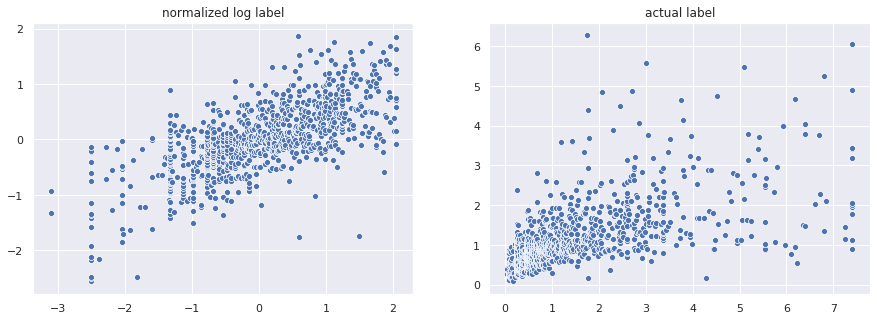

In [0]:
import seaborn as sns
plt.figure(1,figsize=(15,5))
plt.subplot(121)
sns.scatterplot(y,y_hat)
plt.title("normalized log label")
plt.subplot(122)
sns.scatterplot(y_act,y_hat_act)
plt.title("actual label")
plt.show()

Text(0.5, 1, 'normalized log label')

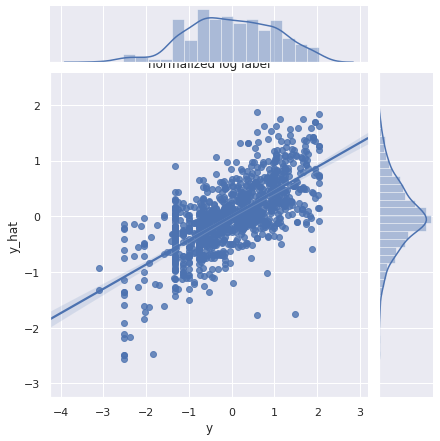

In [0]:
sns.jointplot(x=y ,y= y_hat, kind='reg').set_axis_labels("y", "y_hat")
plt.title("normalized log label")

Text(0.5, 1, 'actual label')

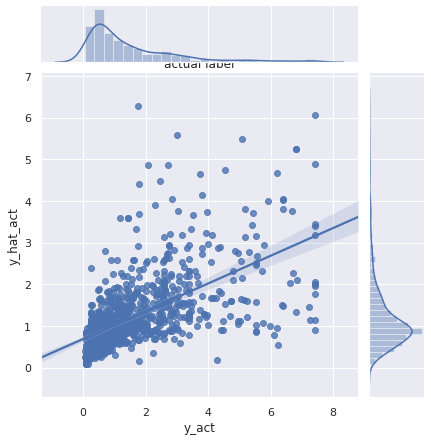

In [0]:
sns.jointplot(x=y_act ,y= y_hat_act, kind='reg').set_axis_labels("y_act", "y_hat_act")
plt.title("actual label")

# New smile(molecule) 
interpretability of molecule feature:

Highlighted nodes in the plotted molecular graph shows that those nodes(functional group of molecule) have more influence in predicting the target label.

In [0]:
smile='N1C(=O)C(C2=CNc3c2c(ccn3)c2c1cccc2)c1ccc(cc1)O'

In [0]:
import torch
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import MolToImage
import networkx as nx
from rdkit.Chem.Draw import IPythonConsole
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [0]:
def drug_to_graph(smile):
    mol=Chem.MolFromSmiles(smile)
    edge_idx,x,l=graph_representation(mol,10,40)
    edge_idx=torch.tensor(edge_idx,dtype=torch.long)
    x=torch.tensor(x,dtype=torch.float)
    l=torch.tensor(l,dtype=torch.float).view(1,-1)
    graph_drug=Data(x=x,edge_index=edge_idx,y=l)
    return graph_drug


# new_drug=drug_to_graph(smile)


def cam(linear_wt,logits):
    linear_wt = linear_wt.detach()
    logits = logits.detach()
    ll=[]
    for i in linear_wt:
        i=i.view(40,128).t()
        l=torch.matmul(logits,i)
        l=torch.sum(l,axis=1)
        l=F.relu(l)
        ll.append(l.numpy())
    return ll

In [0]:
def plot_graph(smile,new_drug,value):
    a = []
    mol = Chem.MolFromSmiles(smile)
    value=np.array(value)
    value=np.sum(value,axis=0)
    value=F.relu(torch.tensor(value)).numpy()
    for atom in mol.GetAtoms():
        a.append(atom.GetSymbol())
    d = {i: k for i, k in enumerate(a)}
    print(d)
    edge_index=new_drug.edge_index
    df = pd.DataFrame({'from': np.array(edge_index[0]), 'to': np.array(edge_index[1])})
    carac = pd.DataFrame({'nodes': [i for i in range(len(a))], 'value': [value[j] for j in range(len(a))]})
    G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph())
    G.nodes()
    # print(G.nodes)
    carac = carac.set_index('nodes')
    carac = carac.reindex(G.nodes())

    return nx.draw(G, with_labels=True, node_color=carac['value'], cmap="YlGnBu")
    # plt.show()


-0.17954593896865845
act_cal: 0.8205745777094032
torch.Size([512, 5120]) torch.Size([40, 128])
(512, 40)
{0: 'N', 1: 'C', 2: 'O', 3: 'C', 4: 'C', 5: 'C', 6: 'N', 7: 'C', 8: 'C', 9: 'C', 10: 'C', 11: 'C', 12: 'N', 13: 'C', 14: 'C', 15: 'C', 16: 'C', 17: 'C', 18: 'C', 19: 'C', 20: 'C', 21: 'C', 22: 'C', 23: 'C', 24: 'C', 25: 'O'}


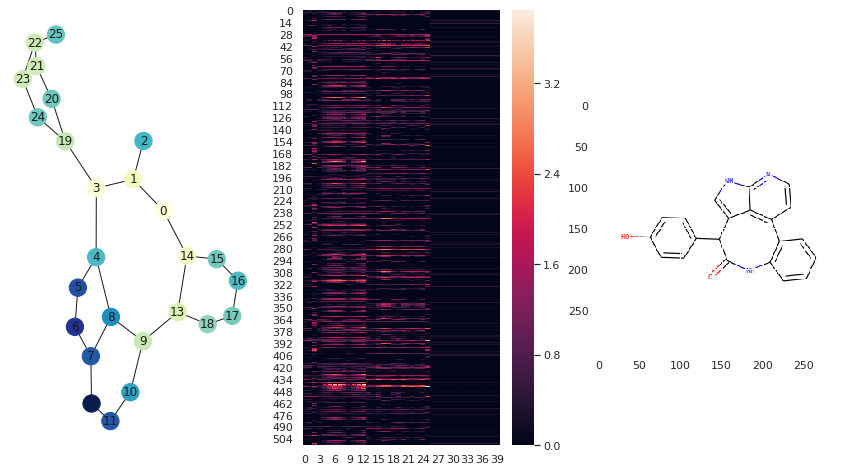

In [0]:
new_drug=drug_to_graph(smile)
model=model.cpu()
# output=model(new_drug.to('cuda'))
output=model(new_drug)
print(output.detach().item()) ######1.668+3.007
print(f"act_cal: {e**(output.detach().item()*0.99-0.02)}")
linear_wt,logits=model.cam()
print(linear_wt.shape,logits.shape)
ll=cam(linear_wt,logits)
print(np.array(ll).shape)


plt.figure(1, figsize=(15,8))
plt.subplot(131)
plot_graph(smile,new_drug,ll)
plt.subplot(132)
sns.heatmap(ll)
plt.subplot(133)
mol=Chem.MolFromSmiles(smile)
fig=MolToImage(mol)
plt.imshow(fig)
plt.show()